### Bayesian Data Analysis, 3rd ed
##  Chapter 3, demos 1-4

Examples and illustrations for a normal model with unknown mean and variance
(BDA3 section 3.2 on p. 64).

In [1]:
from __future__ import division
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import sinvchi2

In [3]:
# Edit default plot settings
plt.rc('font', size=16)

In [4]:
# data
y = np.array([93, 112, 122, 135, 122, 150, 118, 90, 124, 114])
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
my = np.mean(y)

In [5]:
# Factorize the joint posterior p(mu,sigma2|y) to p(sigma2|y)p(mu|sigma2,y)
# Sample from the joint posterior using this factorization

# sample from p(sigma2|y)
sigma2 = sinvchi2.rvs(n-1, s2, size=1000)
# sample from p(mu|sigma2,y) 
mu = my + np.sqrt(sigma2/n)*np.random.randn(*sigma2.shape)
# display sigma instead of sigma2
sigma = np.sqrt(sigma2)
# sample from the predictive distribution p(ynew|y)
# for each sample of (mu, sigma)
ynew = np.random.randn(*mu.shape)*sigma + mu

In [6]:
# For mu compute the density in these points
tl1 = [90, 150]
t1 = np.linspace(tl1[0], tl1[1], 1000)
# For sigma compute the density in these points
tl2 = [10, 60]
t2 = np.linspace(tl2[0], tl2[1], 1000)
# For ynew compute the density in these points
tlynew = [50, 185]
xynew = np.linspace(tlynew[0], tlynew[1], 1000)

# evaluate the joint density in a grid
# note that the following is not normalized, but for plotting
# contours it does not matter
Z = stats.norm.pdf(t1, my, t2[:,np.newaxis]/np.sqrt(n))
Z *= (sinvchi2.pdf(t2**2, n-1, s2)*2*t2)[:,np.newaxis]

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# estimate the marginal density for mu using samples and an ad hoc Gaussian
# kernel approximation
pk_mu = stats.gaussian_kde(mu).evaluate(t1)

# compute the exact marginal density for sigma
# multiplication by 2*t2 is due to the transformation of variable
# z=t2^2, see BDA3 p. 21
pm_sigma = sinvchi2.pdf(t2**2, n-1, s2)*2*t2
# N.B. this was already calculated in the joint distribution case

# estimate the marginal density for sigma using samples and an ad hoc Gaussian
# kernel approximation
pk_sigma = stats.gaussian_kde(sigma).evaluate(t2)

# compute the exact predictive density
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# see BDA3 p. 21
p_new = stats.t.pdf((xynew-my)/np.sqrt(s2*(1+1/n)), n-1) / np.sqrt(s2*(1+1/n))

Visualise the joint density and marginal densities of the posterior of normal 
distribution with unknown mean and variance.

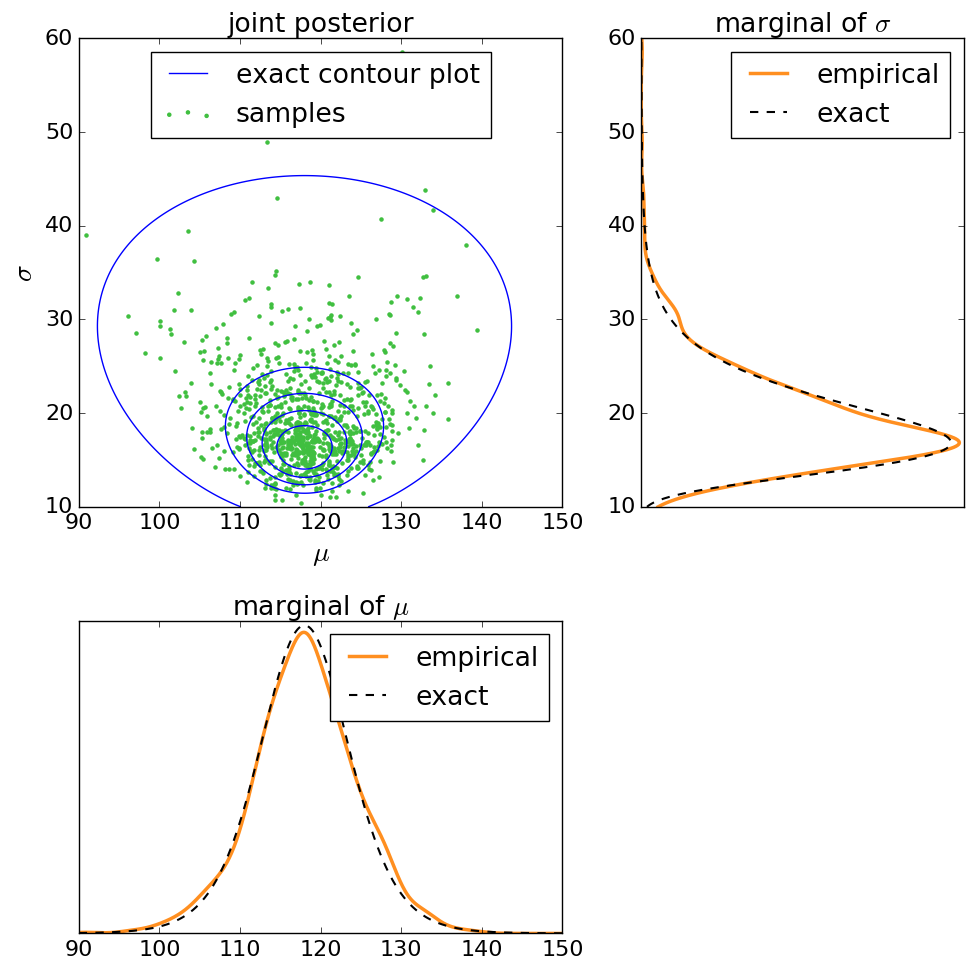

In [7]:
# create figure
plotgrid = gridspec.GridSpec(2, 2, width_ratios=[3,2], height_ratios=[3,2])
fig = plt.figure(figsize=(10,10))

# plot the joint distribution
plt.subplot(plotgrid[0,0])
# plot the contour plot of the exact posterior (c_levels is used to give
# a vector of linearly spaced values at which levels contours are drawn)
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
plt.contour(t1, t2, Z, c_levels, colors='blue')
# plot the samples from the joint posterior
samps = plt.scatter(mu, sigma, 5, color=[0.25, 0.75, 0.25])
# decorate
plt.xlim(tl1)
plt.ylim(tl2)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\sigma$', fontsize=20)
plt.title('joint posterior')
plt.legend(
    (plt.Line2D([], [], color='blue'), samps),
    ('exact contour plot', 'samples'),
    loc='upper center', 
)

# plot the marginal of mu
plt.subplot(plotgrid[1,0])
# empirical
plt.plot(t1, pk_mu, color='#ff8f20', linewidth=2.5, label='empirical')
# exact
plt.plot(t1, pm_mu, 'k--', linewidth=1.5, label='exact')
# decorate
plt.xlim(tl1)
plt.title('marginal of $\mu$')
plt.yticks(())
plt.legend()

# plot the marginal of sigma
plt.subplot(plotgrid[0,1])
# empirical
plt.plot(pk_sigma, t2, color='#ff8f20', linewidth=2.5, label='empirical')
# exact
plt.plot(pm_sigma, t2, 'k--', linewidth=1.5, label='exact')
# decorate
plt.ylim(tl2)
plt.title('marginal of $\sigma$')
plt.xticks(())
plt.tight_layout()
plt.legend();

Visualise factored sampling and the corresponding marginal and conditional densities.

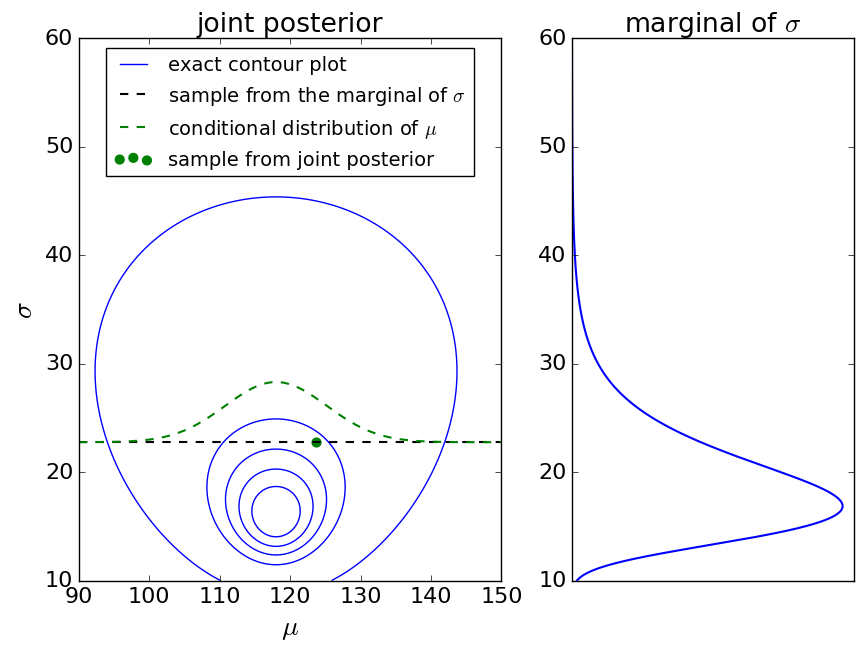

In [8]:
# create figure
plotgrid = gridspec.GridSpec(1, 2, width_ratios=[3,2])
fig = plt.figure(figsize=(10,7))

# plot the joint distribution
ax0 = plt.subplot(plotgrid[0,0])
# plot the contour plot of the exact posterior (c_levels is used to give
# a vector of linearly spaced values at which levels contours are drawn)
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
plt.contour(t1, t2, Z, c_levels, colors='blue')

# plot the first sample
line1, = plt.plot(tl1, [sigma[0], sigma[0]], 'k--', linewidth=1.5)
line2, = plt.plot(
    t1, sigma[0] + stats.norm.pdf(t1, my, np.sqrt(sigma2[0]/n))*100,
    'g--', linewidth=1.5
)
scat = plt.scatter(mu[0], sigma[0], 40, color='g')

# decorate
plt.xlim(tl1)
plt.ylim(tl2)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\sigma$', fontsize=20)
plt.title('joint posterior')
plt.legend(
    (plt.Line2D([], [], color='blue'), line1, line2, scat),
    ('exact contour plot',
     'sample from the marginal of $\\sigma$',
     'conditional distribution of $\\mu$',
     'sample from joint posterior'),
    loc='upper center',
    fontsize=14
)

# plot the marginal of sigma
ax1 = plt.subplot(plotgrid[0,1])
plt.plot(pm_sigma, t2, 'b', linewidth=1.5)
# decorate
plt.ylim(tl2)
plt.title('marginal of $\sigma$')
plt.xticks(());

Visualise the marginal distribution of mu as a mixture of normals.

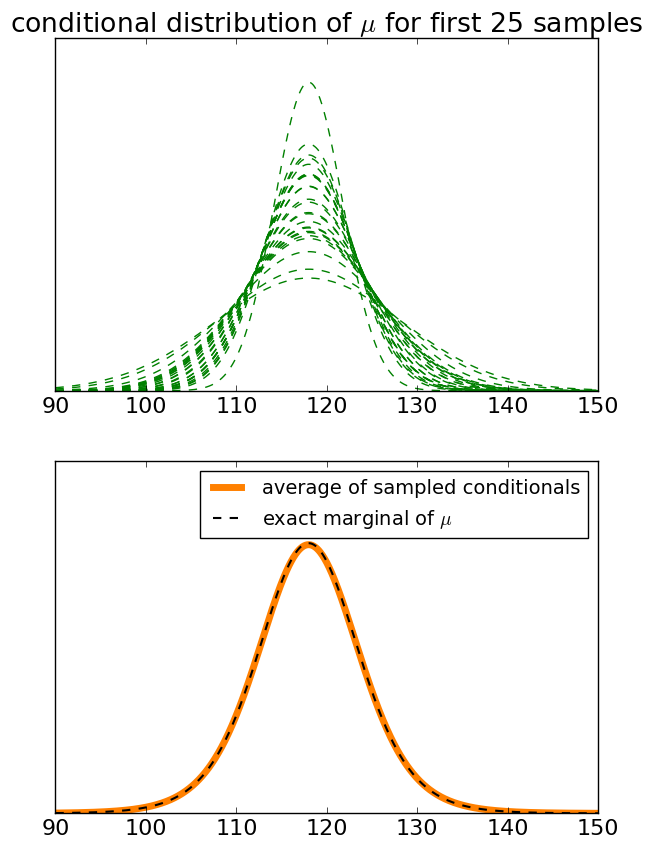

In [9]:
# calculate conditional pdfs for each sample
condpdfs = stats.norm.pdf(t1, my, np.sqrt(sigma2/n)[:,np.newaxis])

fig = plt.figure(figsize=(7,10))

# plot some of them
plt.subplot(2,1,1)
plt.plot(t1, condpdfs[:25].T, 'g--')
plt.xlim(tl1)
plt.title('conditional distribution of $\\mu$ for first 25 samples')
plt.yticks(())

# plot their mean
plt.subplot(2,1,2)
plt.plot(
    t1, np.mean(condpdfs, axis=0),
    color=[1,0.5,0], linewidth=5,
    label='average of sampled conditionals'
)
plt.plot(t1, pm_mu, 'k--', linewidth=1.5, label='exact marginal of $\\mu$')
plt.yticks(())
plt.xlim(tl1)
plt.ylim((0,0.09))
plt.legend(fontsize=14);

Visualise sampling from the posterior predictive distribution.

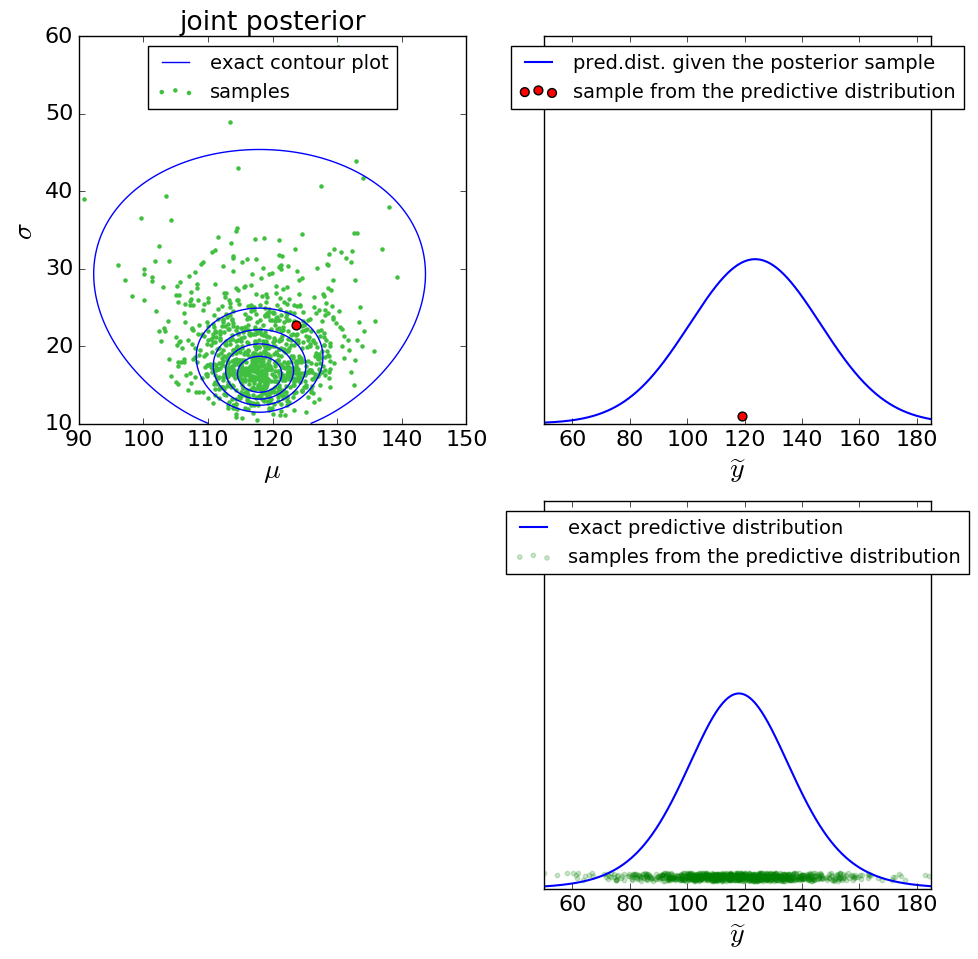

In [10]:
# calculate each predictive pdf with given mu and sigma
ynewdists = stats.norm.pdf(xynew, mu[:,np.newaxis], sigma[:,np.newaxis])

fig = plt.figure(figsize=(11,11))

# plot the joint distribution
plt.subplot(2,2,1)
# plot the contour plot of the exact posterior (c_levels is used to give
# a vector of linearly spaced values at which levels contours are drawn)
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
plt.contour(t1, t2, Z, c_levels, colors='blue')
# plot the samples from the joint posterior
samps = plt.scatter(mu, sigma, 5, color=[0.25, 0.75, 0.25])
# decorate
plt.xlim(tl1)
plt.ylim(tl2)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\sigma$', fontsize=20)
plt.title('joint posterior')
plt.legend(
    (plt.Line2D([], [], color='blue'), samps),
    ('exact contour plot', 'samples'),
    loc='upper center',
    fontsize=14
)
# highlight the first sample
plt.scatter(mu[0], sigma[0], 40, 'r')

# plot first ynew
plt.subplot(2,2,2)
# plot the distribution and the respective sample
line1, = plt.plot(xynew, ynewdists[0], 'b', linewidth=1.5)
ax1_hs = plt.scatter(ynew[0], 0.02*np.max(ynewdists), 40, 'r')
# decorate
plt.ylim([0, np.max(ynewdists)])
plt.xlim(tlynew)
plt.xlabel('$\widetilde{y}$', fontsize=20)
plt.yticks(())
l = plt.legend(
    (line1, ax1_hs),
    ('pred.dist. given the posterior sample',
    'sample from the predictive distribution'),
    loc='upper center',
    fontsize=14
)

# plot all ynews
plt.subplot(2,2,4)
plt.scatter(
    ynew, (0.02 + 0.02*np.random.rand(*ynew.shape))*np.max(ynewdists), 10,
    color=[0,0.5,0], alpha=0.2,
    label = 'samples from the predictive distribution'
)
plt.plot(xynew, p_new, linewidth=1.5,
         label = 'exact predictive distribution')
plt.ylim([0, np.max(ynewdists)])
plt.xlim(tlynew)
plt.xlabel('$\widetilde{y}$', fontsize=20)
plt.yticks(())
plt.legend(loc='upper center', fontsize=14);